In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv("C:\\Users\\sujee.SUJEET\\Downloads\\heart (2).csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [22]:
print('Shape:')
print(df.shape)

Shape:
(303, 14)


In [23]:
print('Columns:')
print(df.columns.tolist())

Columns:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [24]:
print('Head:')
print(df.head())

Head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [25]:
print('Dtypes:')
print(df.dtypes)

Dtypes:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [26]:
print('Null counts:')
print(df.isnull().sum())

Null counts:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [27]:
#VISUALISATION

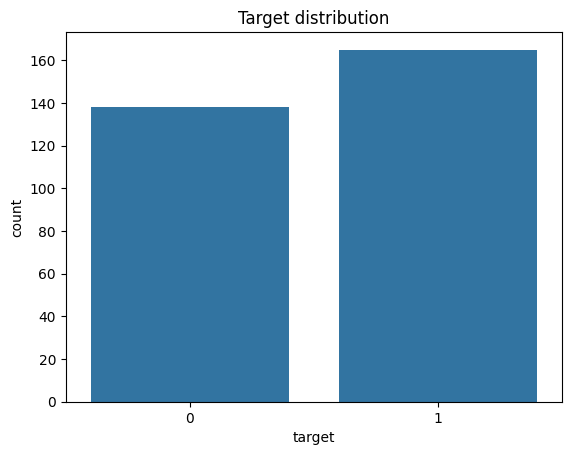

In [28]:
sns.countplot(x='target', data=df)
plt.title('Target distribution')
plt.show()

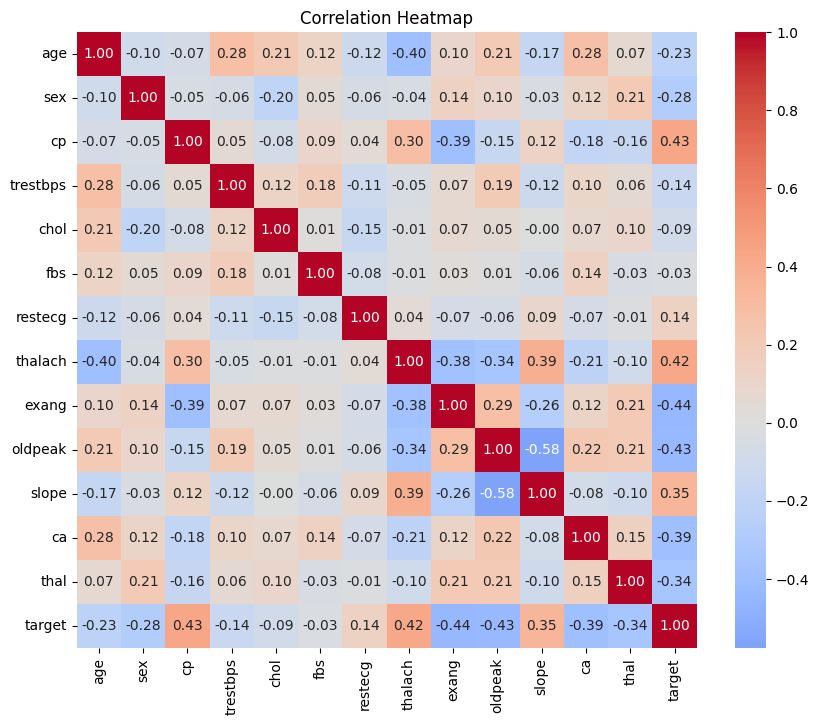

In [36]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", center=0)
plt.title("Correlation Heatmap")
plt.show()

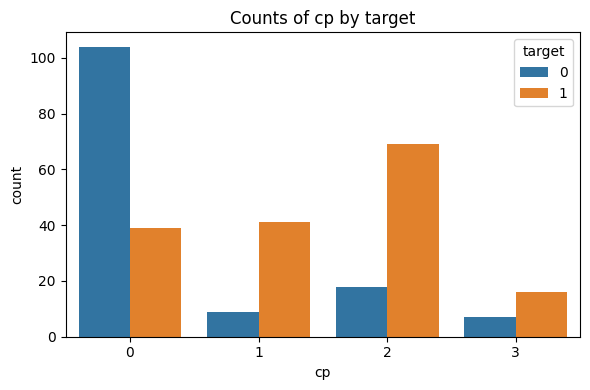

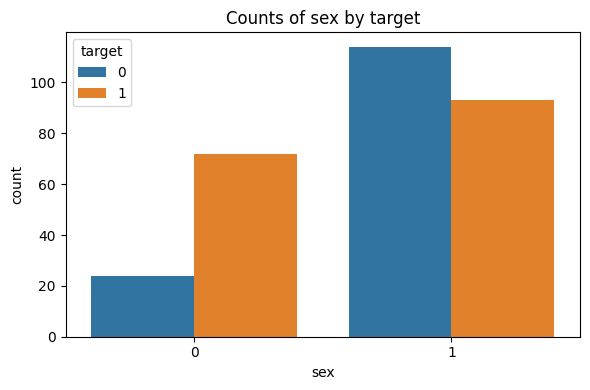

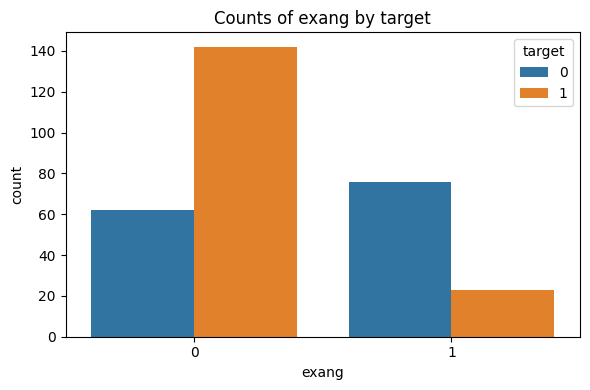

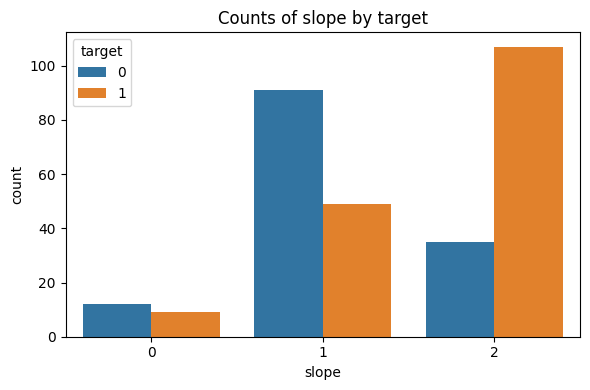

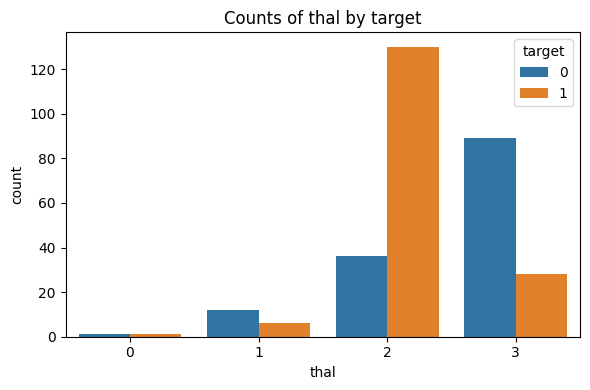

In [30]:
categoricals = ['cp', 'sex', 'exang', 'slope', 'thal']
for col in categoricals:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=col, hue='target')
        plt.title('Counts of ' + col + ' by target')
        plt.tight_layout()
        plt.show()

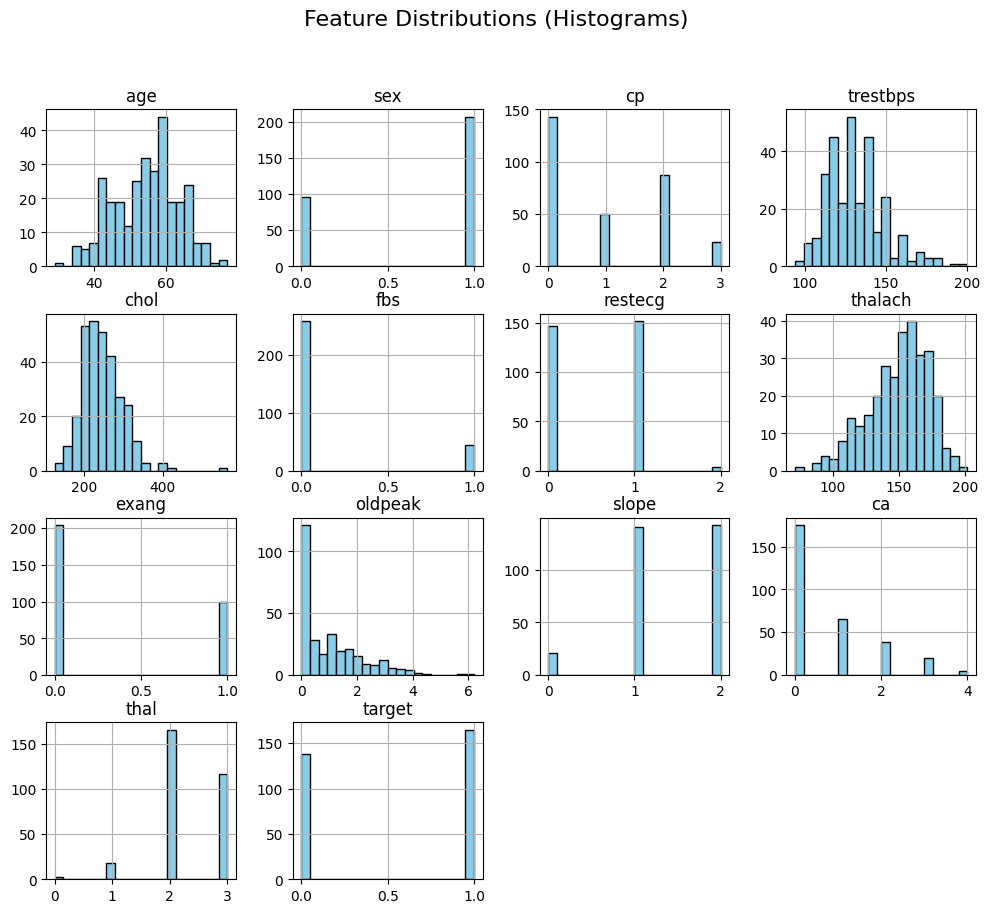

In [37]:
df.hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions (Histograms)", fontsize=16)
plt.show()

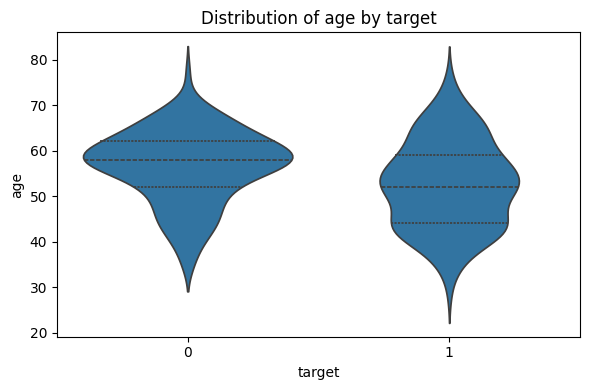

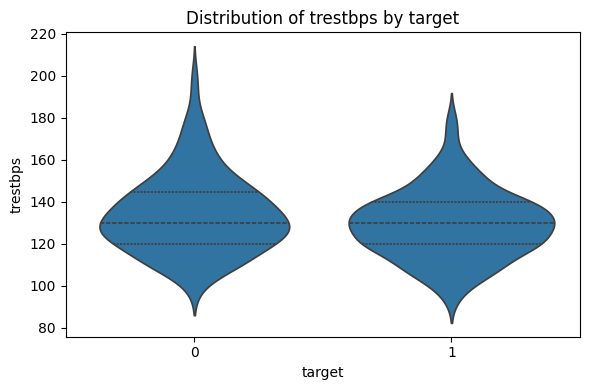

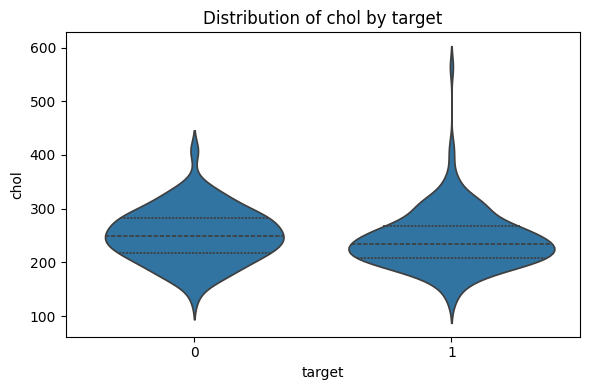

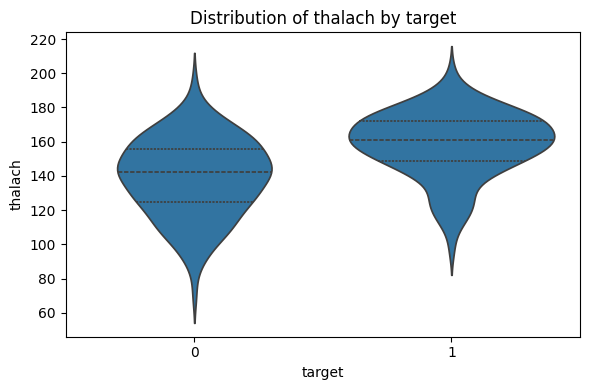

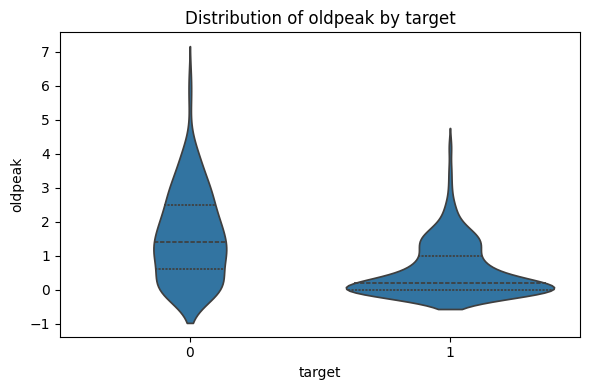

In [31]:
continuous = [c for c in ['age','trestbps','chol','thalach','oldpeak'] if c in df.columns]
for col in continuous:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=df, x='target', y=col, inner='quartile')
    plt.title('Distribution of ' + col + ' by target')
    plt.tight_layout()
    plt.show()

In [32]:
#ML MODEL


In [33]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (important for Logistic Regression & SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
log_reg = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=300, random_state=42)
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)

# Dictionary of models
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'SVM (RBF)': svm_clf
}

# Train and evaluate
results = {}
for name, model in models.items():
    print(f"\n----- {name} -----")

    # Fit model (scaled for LR & SVM, unscaled for RF)
    if name == "Random Forest":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print("Test Accuracy:", round(acc, 4))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



----- Logistic Regression -----
Test Accuracy: 0.8033

Confusion Matrix:
[[19  9]
 [ 3 30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


----- Random Forest -----
Test Accuracy: 0.8197

Confusion Matrix:
[[18 10]
 [ 1 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.64      0.77        28
           1       0.76      0.97      0.85        33

    accuracy                           0.82        61
   macro avg       0.85      0.81      0.81        61
weighted avg       0.85      0.82      0.81        61


----- SVM (RBF) -----
Test Accuracy: 0.8197

Confusion Matrix:
[[19  9]
 [ 2 31]]

Classification Report:
           

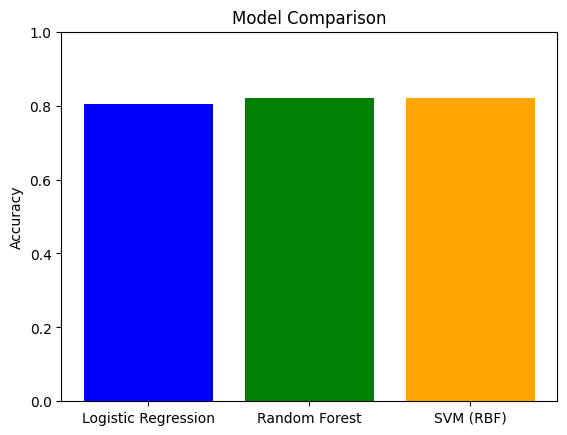

In [34]:
plt.bar(results.keys(), results.values(), color=['blue','green','orange'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0,1)
plt.show()